# INSTALLING NECESSARY MODULES

In [ ]:
pip install pymannkendall pmdarima -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.6 MB/s eta 0:00:00


# IMPORTING NECESSARY MODULES

In [ ]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymannkendall as mk
import scipy.stats as sc
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import seasonal_decompose, adfuller, kpss, ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

# DATA INFORMATION

In [ ]:
df = pd.read_csv('all_airlines_all_airports.csv')
df.head()

,Date,ASM_Domestic,ASM_International,Flights_Domestic,Flights_International,Passengers_Domestic,Passengers_International,RPM_Domestic,RPM_International
0,2002-10-01,57725785,43289662,815489,92565,48054917,9578435,39181901,31535229
1,2002-11-01,54732773,40791272,766775,91342,44850246,9016535,36462419,28497161
2,2002-12-01,56993203,43261782,782175,96881,49684353,10038794,41534214,31761398
3,2003-01-01,56459559,42858438,785651,98053,43032450,9726436,36358651,31073669
4,2003-02-01,50293226,37223024,690750,85965,41166780,8283372,34247719,25641421


Each file includes the following metrics for each month from October 2002 to March 2017:

Date (YYYY-MM-DD): All dates are set to the first of the month. The day value is just a placeholder and has no significance.


ASM_Domestic: Available Seat-Miles in thousands (000s). Number of domestic flights * Number of seats on each flight


ASM_International*: Available Seat-Miles in thousands (000s). Number of international flights * Number of seats on each flight


Flights_Domestic
Flights_International*
Passengers_Domestic
Passengers_International*


RPM_Domestic: Revenue Passenger-Miles in thousands (000s). Number of domestic flights * Number of paying passengers


RPM_International*: Revenue Passenger-Miles in thousands (000s). Number of international flights * Number of paying passengers

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      174 non-null    object
 1   ASM_Domestic              174 non-null    int64 
 2   ASM_International         174 non-null    int64 
 3   Flights_Domestic          174 non-null    int64 
 4   Flights_International     174 non-null    int64 
 5   Passengers_Domestic       174 non-null    int64 
 6   Passengers_International  174 non-null    int64 
 7   RPM_Domestic              174 non-null    int64 
 8   RPM_International         174 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 12.4+ KB


In [ ]:
df.describe()

,ASM_Domestic,ASM_International,Flights_Domestic,Flights_International,Passengers_Domestic,Passengers_International,RPM_Domestic,RPM_International
count,1.740000e+02,1.740000e+02,174.000000,174.000000,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02
mean,5.934979e+07,5.522680e+07,746737.459770,110988.643678,5.415329e+07,1.356835e+07,4.781211e+07,4.391930e+07
std,4.300903e+06,9.840444e+06,70998.239177,11124.388670,5.308818e+06,2.587707e+06,5.545424e+06,9.360987e+06
min,4.800594e+07,3.722302e+07,570076.000000,85965.000000,4.116678e+07,8.283372e+06,3.424772e+07,2.492886e+07
25%,5.640924e+07,4.875751e+07,694986.000000,103315.750000,5.024728e+07,1.176969e+07,4.393475e+07,3.766125e+07
50%,5.966098e+07,5.345515e+07,740968.500000,110569.000000,5.413580e+07,1.321384e+07,4.734903e+07,4.267256e+07
75%,6.254960e+07,6.067220e+07,804790.250000,117756.250000,5.819323e+07,1.528553e+07,5.206172e+07,4.959666e+07
max,7.157587e+07,8.335816e+07,891350.000000,141554.000000,6.612997e+07,2.142620e+07,6.239184e+07,7.157168e+07


# DATA EXPLORATION

In [ ]:
df['Date'] = df['Date'].astype('datetime64[ns]')

<Figure size 3000x2000 with 0 Axes>

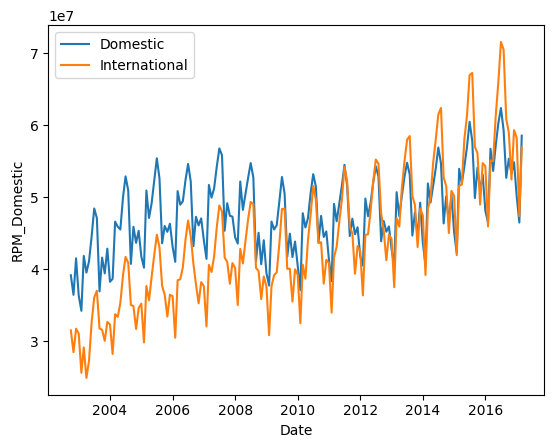

In [ ]:
plt.figure(figsize=(30, 20))
fig, ax = plt.subplots()
sns.lineplot(data = df, x = df['Date'], y = df['RPM_Domestic'], ax=ax, label = 'Domestic')
sns.lineplot(data = df, x = df['Date'], y = df['RPM_International'], ax=ax, label = 'International')
plt.legend()
plt.show()

<Figure size 3000x2000 with 0 Axes>

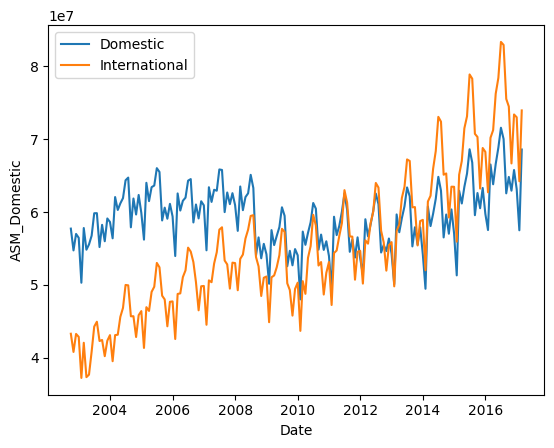

In [ ]:
plt.figure(figsize=(30, 20))
fig, ax = plt.subplots()
sns.lineplot(data = df, x = df['Date'], y = df['ASM_Domestic'], ax=ax, label = 'Domestic')
sns.lineplot(data = df, x = df['Date'], y = df['ASM_International'], ax=ax, label = 'International')
plt.legend()
plt.show()

<Figure size 3000x2000 with 0 Axes>

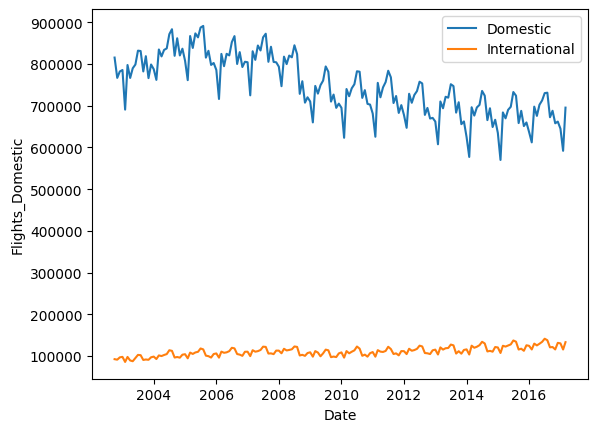

In [ ]:
plt.figure(figsize=(30, 20))
fig, ax = plt.subplots()
sns.lineplot(data = df, x = df['Date'], y = df['Flights_Domestic'], ax=ax, label = 'Domestic')
sns.lineplot(data = df, x = df['Date'], y = df['Flights_International'], ax=ax, label = 'International')
plt.legend()
plt.show()

<Figure size 3000x2000 with 0 Axes>

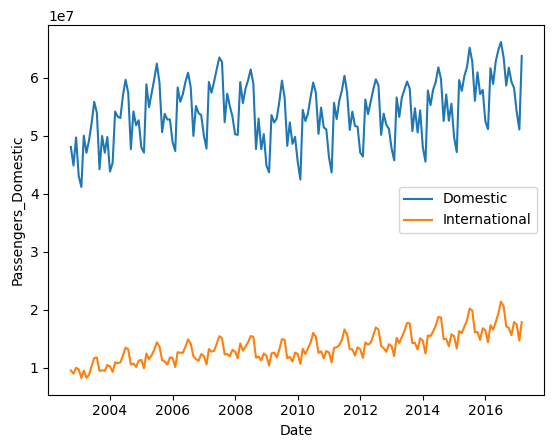

In [ ]:
plt.figure(figsize=(30, 20))
fig, ax = plt.subplots()
sns.lineplot(data = df, x = df['Date'], y = df['Passengers_Domestic'], ax=ax, label = 'Domestic')
sns.lineplot(data = df, x = df['Date'], y = df['Passengers_International'], ax=ax, label = 'International')
plt.legend()
plt.show()

# DECOMPOSITION

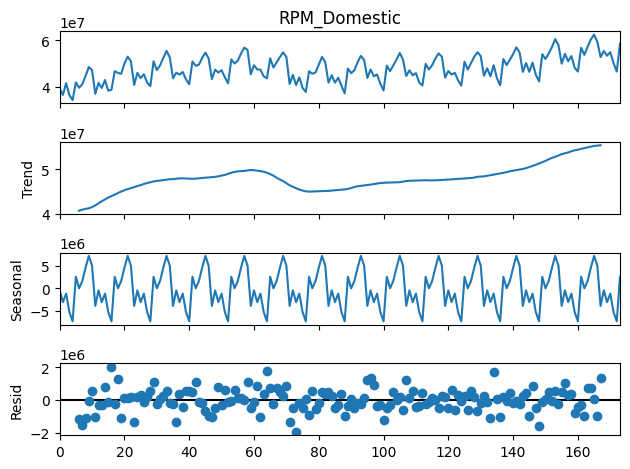

In [ ]:
decom_dom = seasonal_decompose(df['RPM_Domestic'], model = 'add', period = 12)
decom_dom.plot()
plt.show()

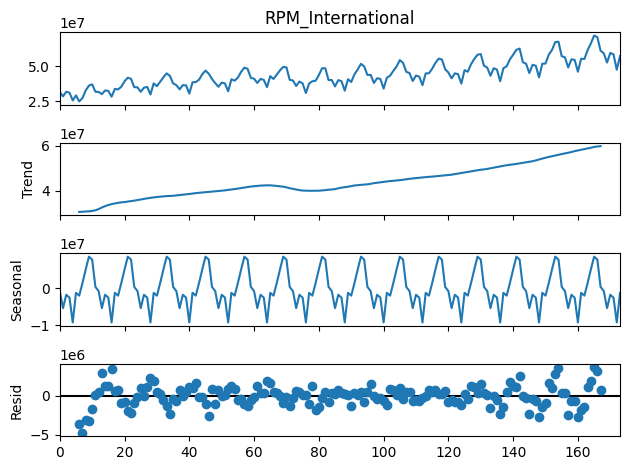

In [ ]:
decom_int = seasonal_decompose(df['RPM_International'], model = 'add', period = 12)
decom_int.plot()
plt.show()

# MANN-KENDALL TEST

In [ ]:
mk_test_dom = mk.original_test(df['RPM_Domestic'])

print('Results of Mann Kendall test for RPM_Domestic:')
mk_output_dom = pd.Series(mk_test_dom[0:9], index=['Trend', 'h-value', 'p-value', 'z-value', 'Tau', 's-value', 'var_s', 'slope', 'intercept'])
print(mk_output_dom)

Results of Mann Kendall test for RPM_Domestic:
Trend             increasing
h-value                 True
p-value                  0.0
z-value             6.281141
Tau                  0.32071
s-value               4827.0
var_s          590333.666667
slope           53935.225806
intercept    42683633.967742
dtype: object


In [ ]:
mk_test_int = mk.original_test(df['RPM_International'])

print('Results of Mann Kendall test for RPM_International:')
mk_output_dom = pd.Series(mk_test_int[0:9], index=['Trend', 'h-value', 'p-value', 'z-value', 'Tau', 's-value', 'var_s', 'slope', 'intercept'])
print(mk_output_dom)

Results of Mann Kendall test for RPM_International:
Trend             increasing
h-value                 True
p-value                  0.0
z-value            12.421718
Tau                 0.634177
s-value               9545.0
var_s          590333.666667
slope          147726.271739
intercept    29894232.994565
dtype: object


# KRUSKAL TEST

In [ ]:
from scipy.stats import kruskal

rpm_domestic = df['RPM_Domestic']

# Perform the Kruskal-Wallis test
kruskal_result = kruskal(df.index, rpm_domestic)

# Print the test results
print("Kruskal-Wallis test results:")
print("H-statistic:", kruskal_result.statistic)
print("p-value:", kruskal_result.pvalue)

Kruskal-Wallis test results:
H-statistic: 260.25214899713455
p-value: 1.5120069315062763e-58


# ADFULLER TEST (NON-DIFFERENCED DATA)

Null Hypothesis (HO): Series is non-stationary, or series has a unit root.

Alternate Hypothesis(HA): Series is stationary, or series has no unit root.

Reject NULL if p < 0.05

In [ ]:
adf_test_dom = adfuller(df['RPM_Domestic'], autolag = 'AIC')

print('Results of ADF test on RPM_domestic:')
adf_output_dom = pd.Series(adf_test_dom[0:4], index = ['Test Statistic', 'p-value', 'No. of Lags used', 'Number of Observations Used'])
for key, value in adf_test_dom[4].items():
    adf_output_dom['Critical value %s'%key] = value

print(adf_output_dom)

Results of ADF test on RPM_domestic:
Test Statistic                  -1.710925
p-value                          0.425493
No. of Lags used                13.000000
Number of Observations Used    160.000000
Critical value 1%               -3.471896
Critical value 5%               -2.879780
Critical value 10%              -2.576495
dtype: float64


In [ ]:
adf_test_int = adfuller(df['RPM_International'], autolag = 'AIC')

print('Results of ADF test on RPM_domestic:')
adf_output_int = pd.Series(adf_test_int[0:4], index = ['Test Statistic', 'p-value', 'No. of Lags used', 'Number of Observations Used'])
for key, value in adf_test_int[4].items():
    adf_output_int['Critical value %s'%key] = value

print(adf_output_int)

Results of ADF test on RPM_domestic:
Test Statistic                  -0.042238
p-value                          0.954896
No. of Lags used                13.000000
Number of Observations Used    160.000000
Critical value 1%               -3.471896
Critical value 5%               -2.879780
Critical value 10%              -2.576495
dtype: float64


# KPSS TEST (NON-DIFFERENCED DATA)

*Null Hypothesis (HO)*: Series is trend stationary or series has no unit root.

*Alternate Hypothesis(HA)*: Series is non-stationary, or series has a unit root.

Reject NULL if p < 0.05

In [ ]:
warnings.simplefilter("ignore")
kpss_test_dom = kpss(df['RPM_Domestic'])

print('Result of KPSS test on RPM_Domestic:')
kpss_output_dom = pd.Series(kpss_test_dom[0:4], index = ['Test Statistic', 'p-value', 'No. of Lags used', 'Critical Values'])
print(kpss_output_dom)

Result of KPSS test on RPM_Domestic:
Test Statistic                                               1.078843
p-value                                                          0.01
No. of Lags used                                                    7
Critical Values     {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%...
dtype: object


In [ ]:
warnings.simplefilter("ignore")
kpss_test_int = kpss(df['RPM_International'])

print('Result of KPSS test on RPM_International:')
kpss_output_int = pd.Series(kpss_test_int[0:4], index = ['Test Statistic', 'p-value', 'No. of Lags used', 'Critical Values'])
print(kpss_output_int)

Result of KPSS test on RPM_International:
Test Statistic                                                1.79721
p-value                                                          0.01
No. of Lags used                                                    8
Critical Values     {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%...
dtype: object


# EXPONENTIAL SMOOTHING MODEL ON RPM_DOMESTIC

In [ ]:
train_df_exp = df[:int(df.shape[0]*0.7)]
test_df_exp = df[int(df.shape[0]*0.7):]

In [ ]:
train_df_exp.shape, test_df_exp.shape

((121, 9), (53, 9))

In [ ]:
model_exp_dom = ExponentialSmoothing(train_df_exp['RPM_Domestic'],trend='add',seasonal='add',seasonal_periods=12).fit()
model_exp_dom.params

{'smoothing_level': 0.6060714285714286,
 'smoothing_trend': 0.05509740259740259,
 'smoothing_seasonal': 0.021884920634920632,
 'damping_trend': nan,
 'initial_level': 40138557.32777776,
 'initial_trend': 330301.9335858603,
 'initial_seasons': array([ -899212.68229167, -2720214.046875  , -1127749.49479167,
        -4907104.74479167, -6548210.53645833,  2956112.75520833,
          302521.27604167,  1037775.296875  ,  4398830.55729167,
         7280193.171875  ,  5000455.78645833, -4773397.33854167]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
residuals = model_exp_dom.resid
residuals.head(5)

0   -3.877456e+05
1   -1.368579e+06
2    2.668555e+06
3   -7.057517e+05
4   -1.085039e+06
dtype: float64

In [ ]:
test_predictions = model_exp_dom.forecast(len(test_df_exp)).rename('HW Test Forecast')
test_predictions.head(5)

121    4.509918e+07
122    4.686145e+07
123    4.312428e+07
124    4.149180e+07
125    5.106586e+07
Name: HW Test Forecast, dtype: float64

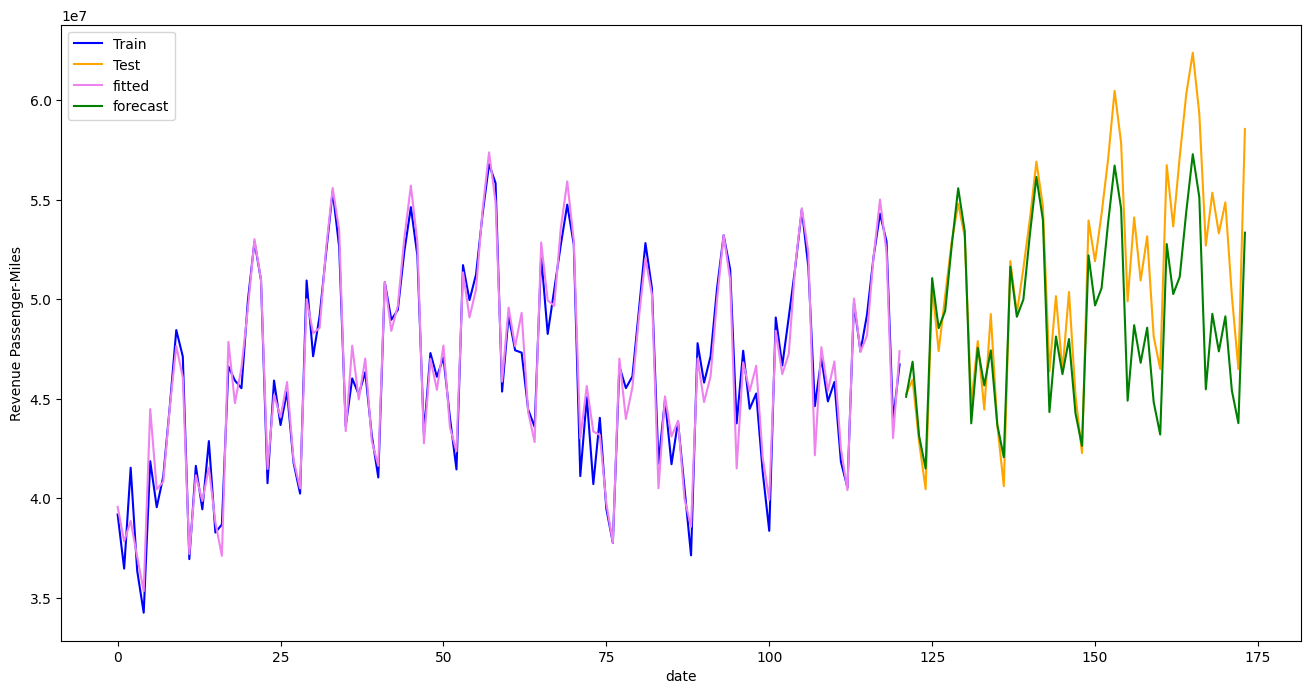

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(train_df_exp['RPM_Domestic'],label='Train', color='blue')
plt.plot(test_df_exp['RPM_Domestic'], label = 'Test', color='orange')
plt.plot(model_exp_dom.fittedvalues , label='fitted', color='violet')
plt.plot(test_predictions , label ='forecast', color='green')
plt.xlabel('date')
plt.ylabel('Revenue Passenger-Miles')
plt.legend()
plt.show()

# EXPONENTIAL SMOOTHING MODEL ON RPM_INTERNATIONAL

In [ ]:
model_exp_int = ExponentialSmoothing(train_df_exp['RPM_International'],trend='add',seasonal='add',seasonal_periods=12).fit()
model_exp_int.params

{'smoothing_level': 0.8889285714285714,
 'smoothing_trend': 0.032923280423280424,
 'smoothing_seasonal': 0.1110714285714286,
 'damping_trend': nan,
 'initial_level': 29767195.502777763,
 'initial_trend': 347868.3654040424,
 'initial_seasons': array([ -982286.58680556, -3884739.25347222, -1300782.49305556,
        -1689284.71180556, -7146199.88888889,   103804.35069444,
        -2035265.11805556,   120062.54861111,  4034212.91319445,
         6737258.97569445,  5644915.06944444,   398304.19444445]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
residuals = model_exp_int.resid
residuals.head(5)

0    2.402452e+06
1   -2.869512e+05
2    2.386266e+05
3   -6.894875e+05
4   -4.485016e+05
dtype: float64

In [ ]:
test_predictions = model_exp_int.forecast(len(test_df_exp)).rename('HW Test Forecast')
test_predictions.head(5)

121    4.197911e+07
122    4.571754e+07
123    4.500979e+07
124    3.925321e+07
125    4.707807e+07
Name: HW Test Forecast, dtype: float64

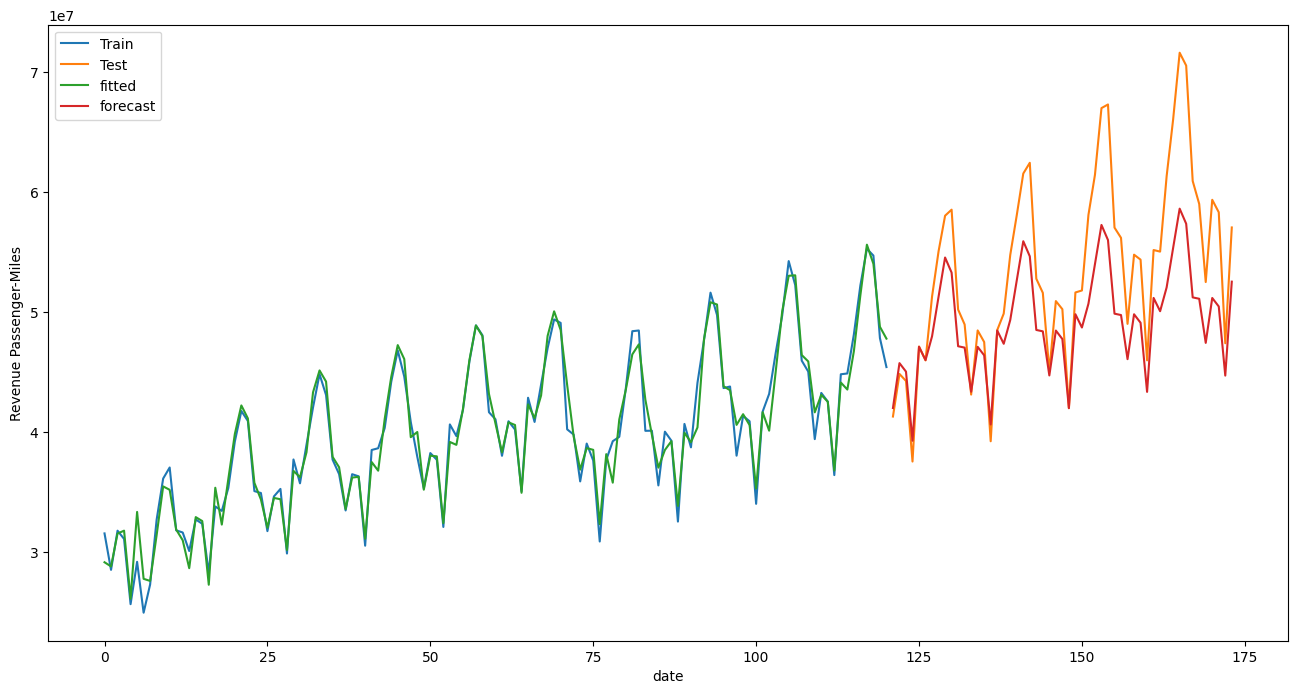

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(train_df_exp['RPM_International'],label='Train')
plt.plot(test_df_exp['RPM_International'], label = 'Test')
plt.plot(model_exp_int.fittedvalues , label='fitted')
plt.plot(test_predictions , label ='forecast')
plt.xlabel('date')
plt.ylabel('Revenue Passenger-Miles')
plt.legend()
plt.show()

# RPM DOMESTIC PLOTS (BEFORE DIFFERENCING)

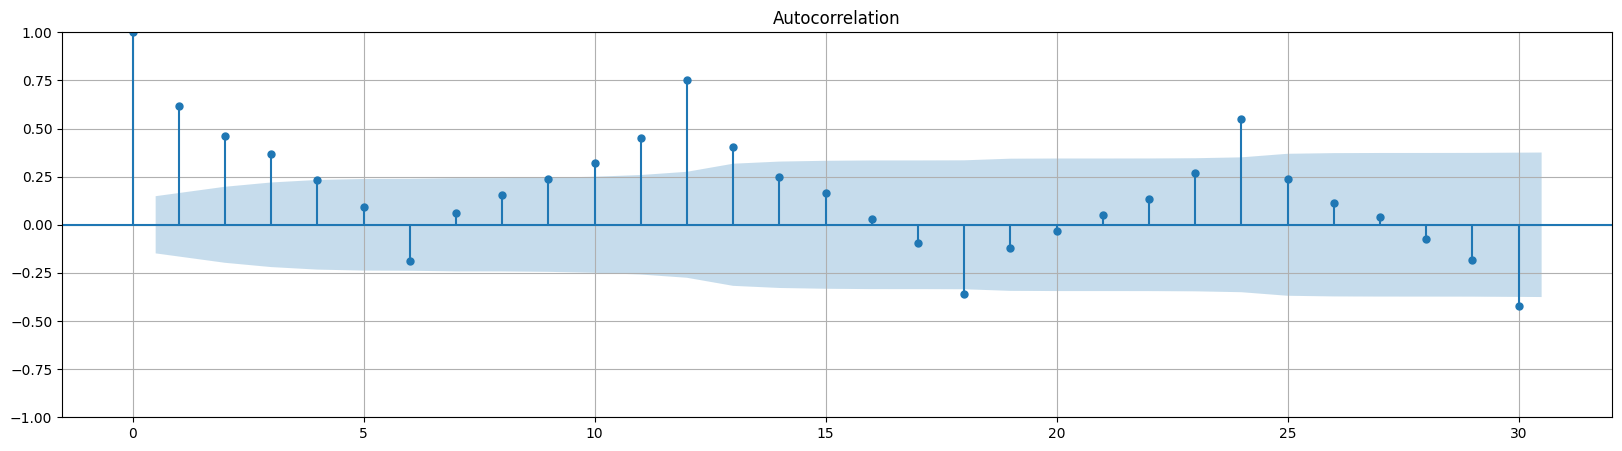

In [ ]:
plt.figure(figsize=(20, 5))
plt.grid()
plot_acf(df['RPM_Domestic'] , ax=plt.gca(), lags =30 )
plt.show()

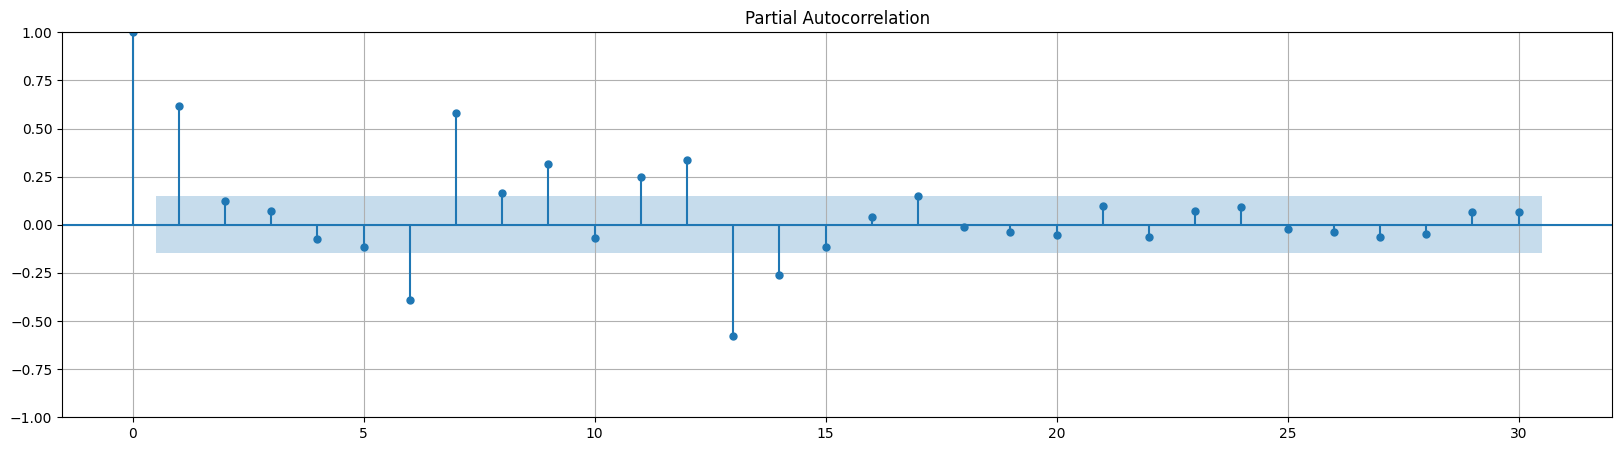

In [ ]:
plt.figure(figsize=(20, 5))
plt.grid()
plot_pacf(df['RPM_Domestic'] , ax=plt.gca(), lags =30 )
plt.show()

# RPM INTERNATIONAL PLOTS (BEFORE DIFFERENCING)

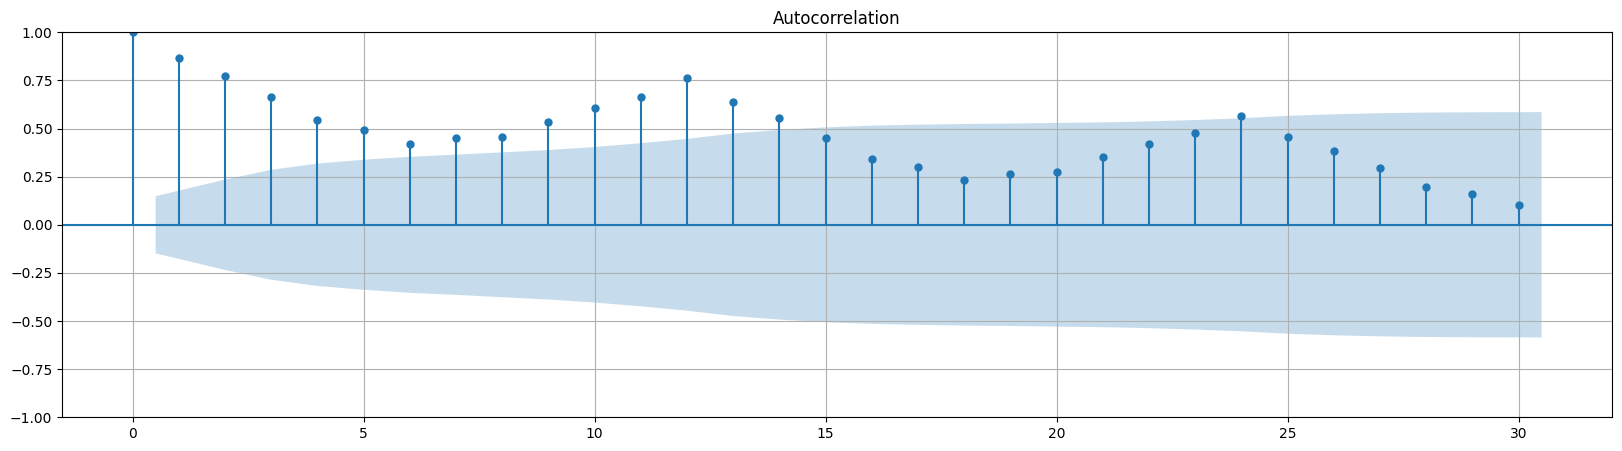

In [ ]:
plt.figure(figsize=(20, 5))
plt.grid()
plot_acf(df['RPM_International'] , ax=plt.gca(), lags =30 )
plt.show()

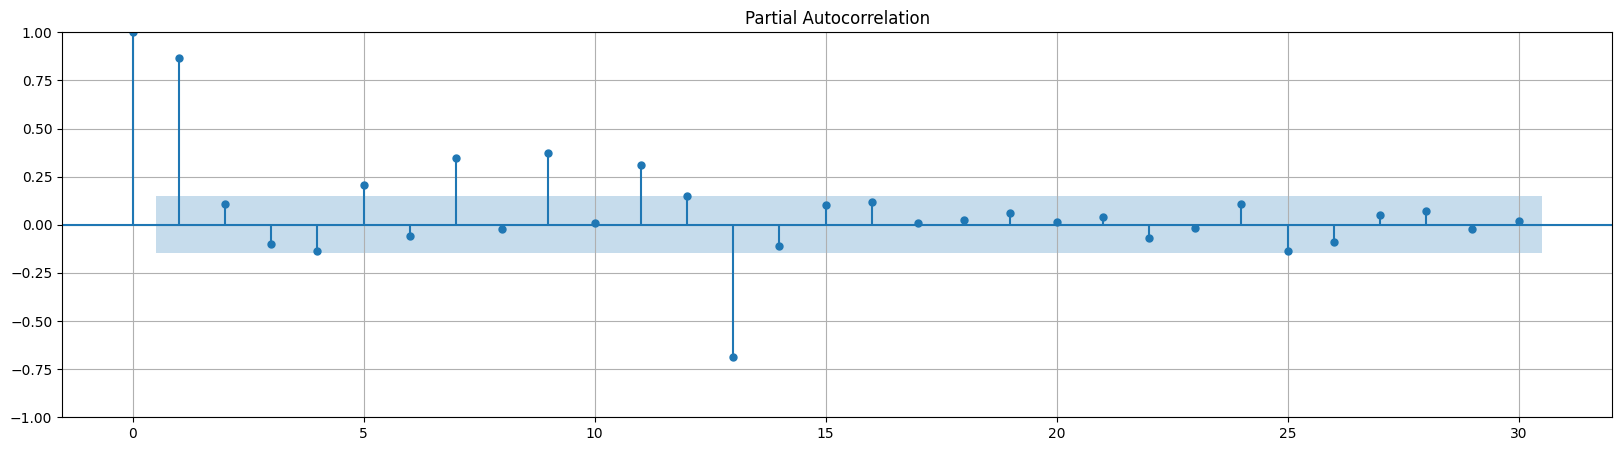

In [ ]:
plt.figure(figsize=(20, 5))
plt.grid()
plot_pacf(df['RPM_International'] , ax=plt.gca(), lags =30 )
plt.show()

# NON-SEASONAL DIFFERENCING

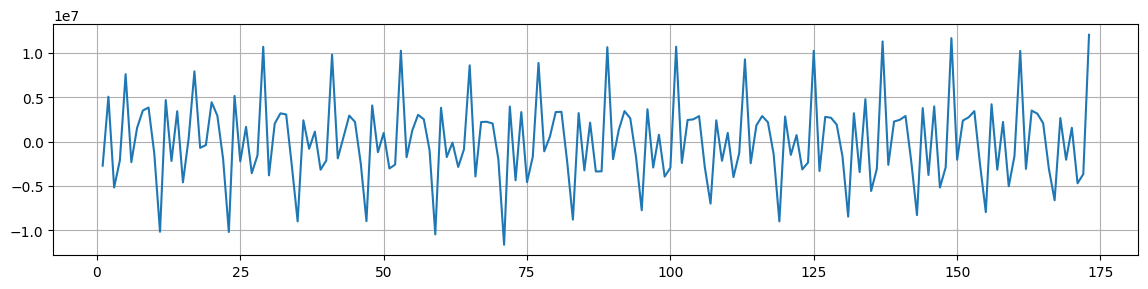

In [ ]:
diff_dom = df['RPM_Domestic'].diff().dropna()
plt.figure(figsize=(14, 3))
plt.grid()
plt.plot(diff_dom)
plt.show()

In [ ]:
diff_dom.head()

1   -2719482.0
2    5071795.0
3   -5175563.0
4   -2110932.0
5    7618135.0
Name: RPM_Domestic, dtype: float64

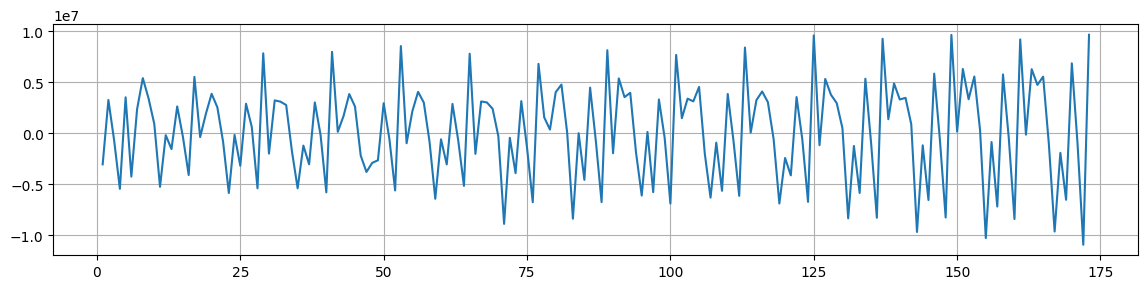

In [ ]:
diff_int = df['RPM_International'].diff().dropna()
plt.figure(figsize=(14, 3))
plt.grid()
plt.plot(diff_int)
plt.show()

In [ ]:
diff_int.head()

1   -3038068.0
2    3264237.0
3    -687729.0
4   -5432248.0
5    3526692.0
Name: RPM_International, dtype: float64

# SEASONAL DIFFERENCING

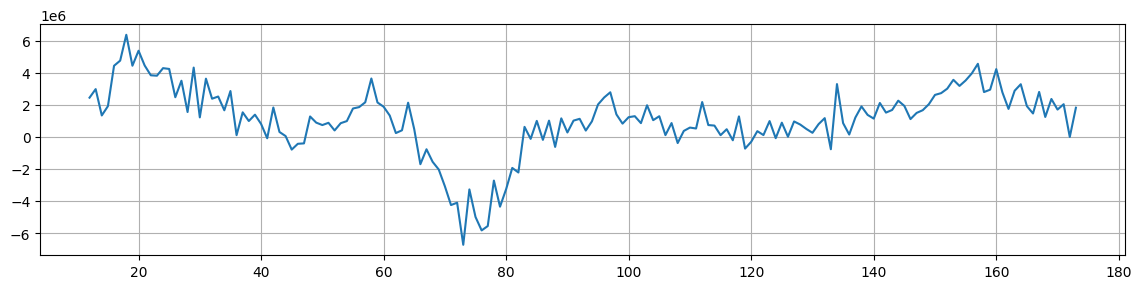

In [ ]:
sdiff_dom = df['RPM_Domestic'].diff(periods = 12).dropna()
plt.figure(figsize=(14, 3))
plt.grid()
plt.plot(sdiff_dom)
plt.show()

In [ ]:
sdiff_dom.head(5)

12    2446425.0
13    2980528.0
14    1338322.0
15    1918205.0
16    4435712.0
Name: RPM_Domestic, dtype: float64

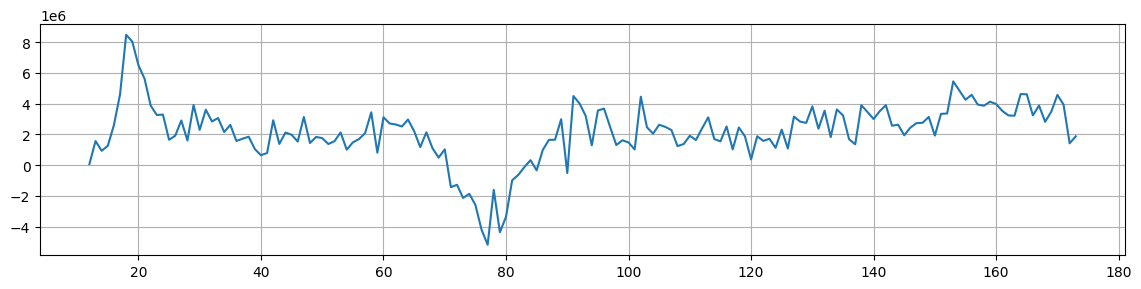

In [ ]:
sdiff_int = df['RPM_International'].diff(periods = 12).dropna()
plt.figure(figsize=(14, 3))
plt.grid()
plt.plot(sdiff_int)
plt.show()

In [ ]:
sdiff_int.head(5)

12      76007.0
13    1570515.0
14     937702.0
15    1260779.0
16    2611541.0
Name: RPM_International, dtype: float64

# NON-SEASONAL AND SEASONAL DIFFERENCING

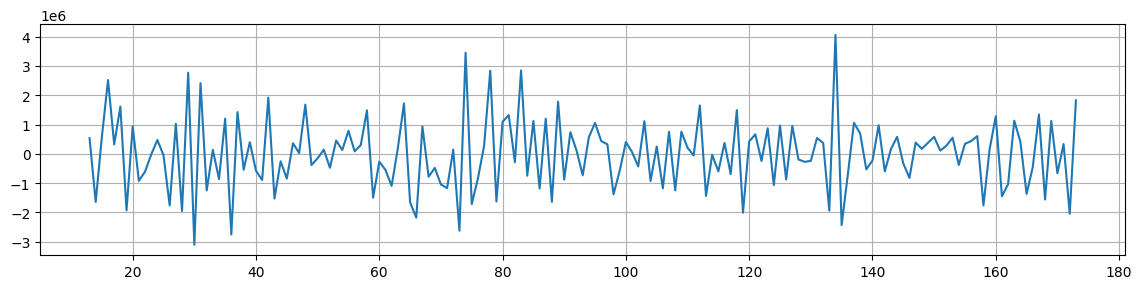

In [ ]:
sddiff_dom = sdiff_dom.diff().dropna()
plt.figure(figsize=(14, 3))
plt.grid()
plt.plot(sddiff_dom)
plt.show()

In [ ]:
sddiff_dom.head(5)

13     534103.0
14   -1642206.0
15     579883.0
16    2517507.0
17     321102.0
Name: RPM_Domestic, dtype: float64

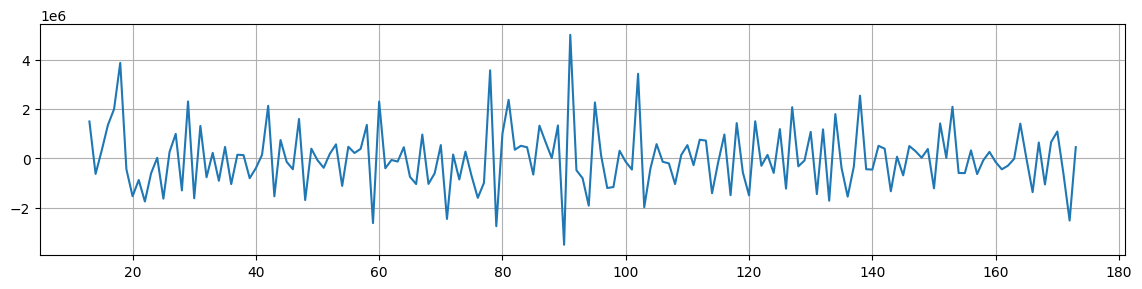

In [ ]:
sddiff_int = sdiff_int.diff().dropna()
plt.figure(figsize=(14, 3))
plt.grid()
plt.plot(sddiff_int)
plt.show()

In [ ]:
sddiff_int.head(5)

13    1494508.0
14    -632813.0
15     323077.0
16    1350762.0
17    1998016.0
Name: RPM_International, dtype: float64

# ADFULLER TEST (DIFFERENCED DATA)

In [ ]:
adf_sddiff_dom = adfuller(sddiff_dom, autolag = 'AIC')

print('Results of ADF test on sddiff_dom:')
adf_output_sddiff_dom = pd.Series(adf_sddiff_dom[0:4], index = ['Test Statistic', 'p-value', 'No. of Lags used', 'Number of Observations Used'])
for key, value in adf_sddiff_dom[4].items():
    adf_output_sddiff_dom['Critical value %s'%key] = value

print(adf_output_sddiff_dom)

Results of ADF test on sddiff_dom:
Test Statistic                  -4.170116
p-value                          0.000740
No. of Lags used                14.000000
Number of Observations Used    146.000000
Critical value 1%               -3.475953
Critical value 5%               -2.881548
Critical value 10%              -2.577439
dtype: float64


In [ ]:
adf_sddiff_int = adfuller(sddiff_int, autolag = 'AIC')

print('Results of ADF test on sddiff_int:')
adf_output_sddiff_int = pd.Series(adf_sddiff_int[0:4], index = ['Test Statistic', 'p-value', 'No. of Lags used', 'Number of Observations Used'])
for key, value in adf_sddiff_int[4].items():
    adf_output_sddiff_int['Critical value %s'%key] = value

print(adf_output_sddiff_int)

Results of ADF test on sddiff_int:
Test Statistic                  -3.604142
p-value                          0.005682
No. of Lags used                10.000000
Number of Observations Used    150.000000
Critical value 1%               -3.474715
Critical value 5%               -2.881009
Critical value 10%              -2.577151
dtype: float64


# KPSS TEST (DIFFERENCED DATA)

In [ ]:
warnings.simplefilter("ignore")
kpss_sddiff = kpss(sddiff_dom)

print('Result of KPSS test on sddiff_dom:')
kpss_output_sddiff = pd.Series(kpss_sddiff[0:4], index = ['Test Statistic', 'p-value', 'No. of Lags used', 'Critical Values'])
print(kpss_output_sddiff)

Result of KPSS test on sddiff_dom:
Test Statistic                                                0.08124
p-value                                                           0.1
No. of Lags used                                                   19
Critical Values     {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%...
dtype: object


In [ ]:
warnings.simplefilter("ignore")
kpss_sddiff_int = kpss(sddiff_int)

print('Result of KPSS test on sddiff_int:')
kpss_output_sddiff_int = pd.Series(kpss_sddiff_int[0:4], index = ['Test Statistic', 'p-value', 'No. of Lags used', 'Critical Values'])
print(kpss_output_sddiff_int)

Result of KPSS test on sddiff_int:
Test Statistic                                               0.039502
p-value                                                           0.1
No. of Lags used                                                    5
Critical Values     {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%...
dtype: object


# RPM DOMESTIC PLOTS (AFTER DIFFERENCING)

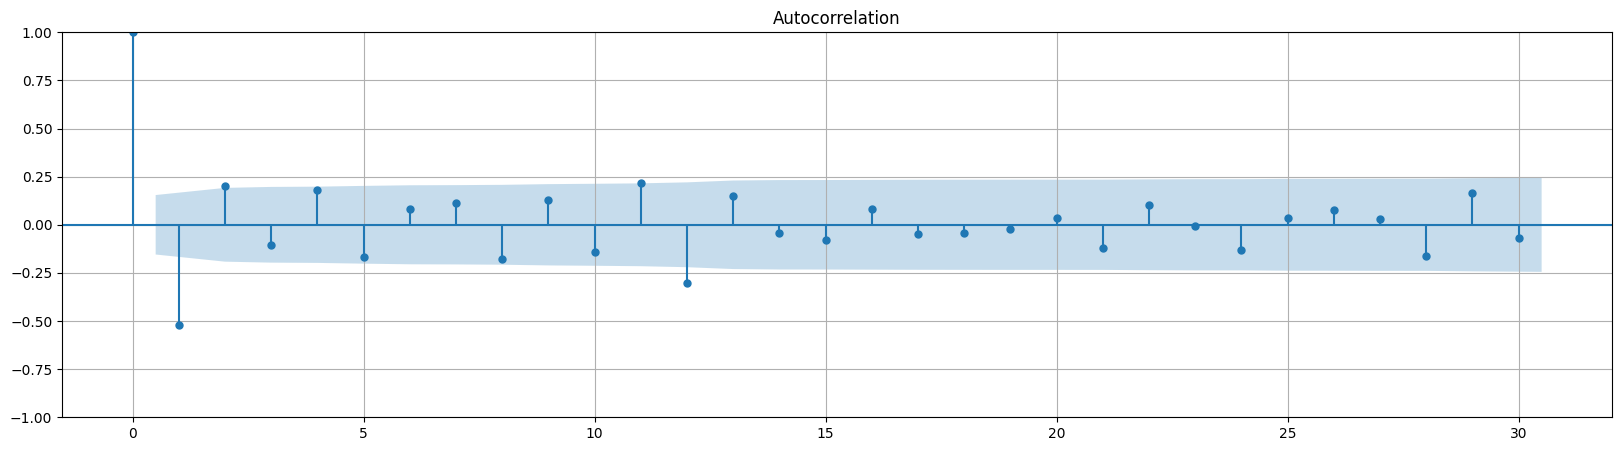

In [ ]:
plt.figure(figsize=(20, 5))
plt.grid()
plot_acf(sddiff_dom , ax=plt.gca(), lags = 30)
plt.show()

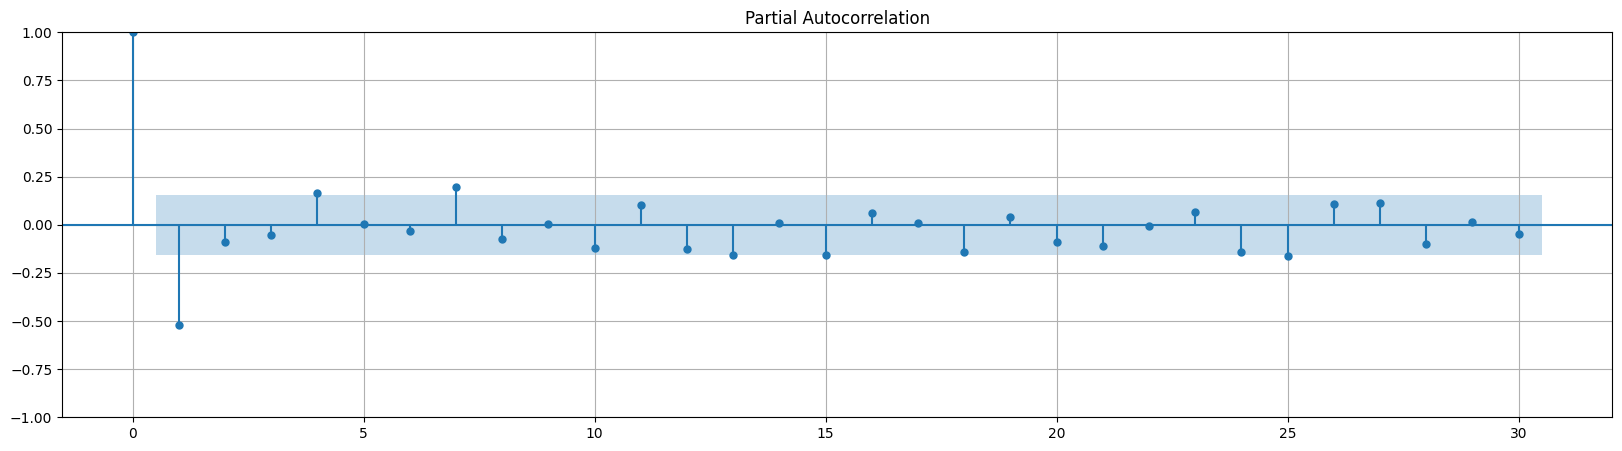

In [ ]:
plt.figure(figsize=(20, 5))
plt.grid()
plot_pacf(sddiff_dom , ax=plt.gca(), lags = 30)
plt.show()

# RPM INTERNATIONAL PLOTS (AFTER DIFFERENCING)

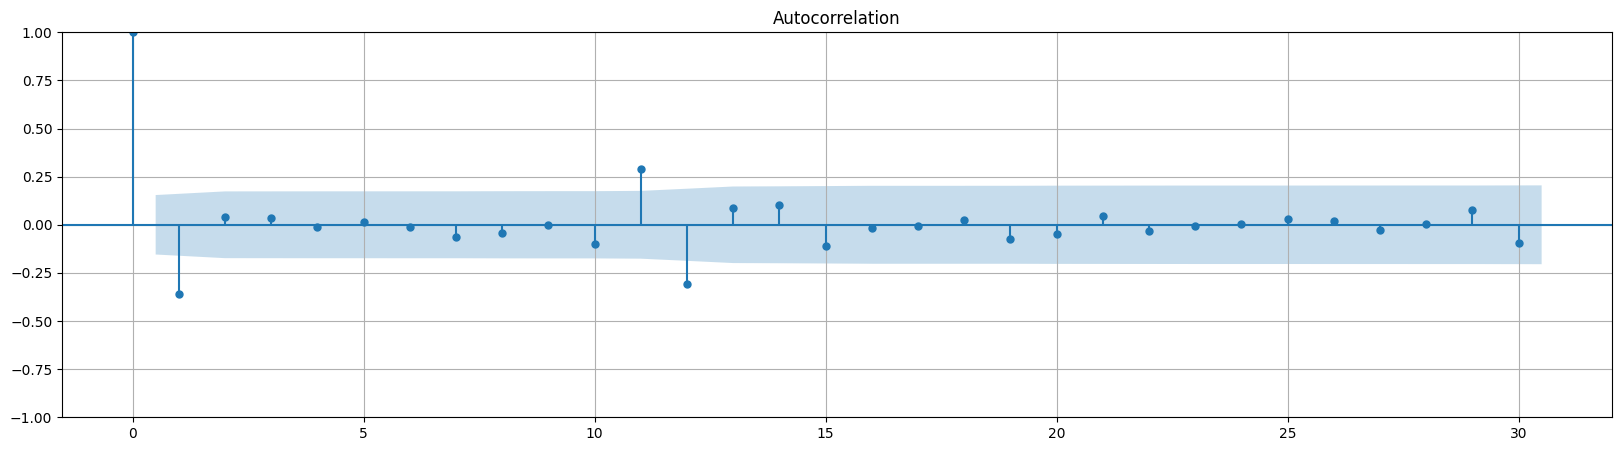

In [ ]:
plt.figure(figsize=(20, 5))
plt.grid()
plot_acf(sddiff_int , ax=plt.gca(), lags = 30)
plt.show()

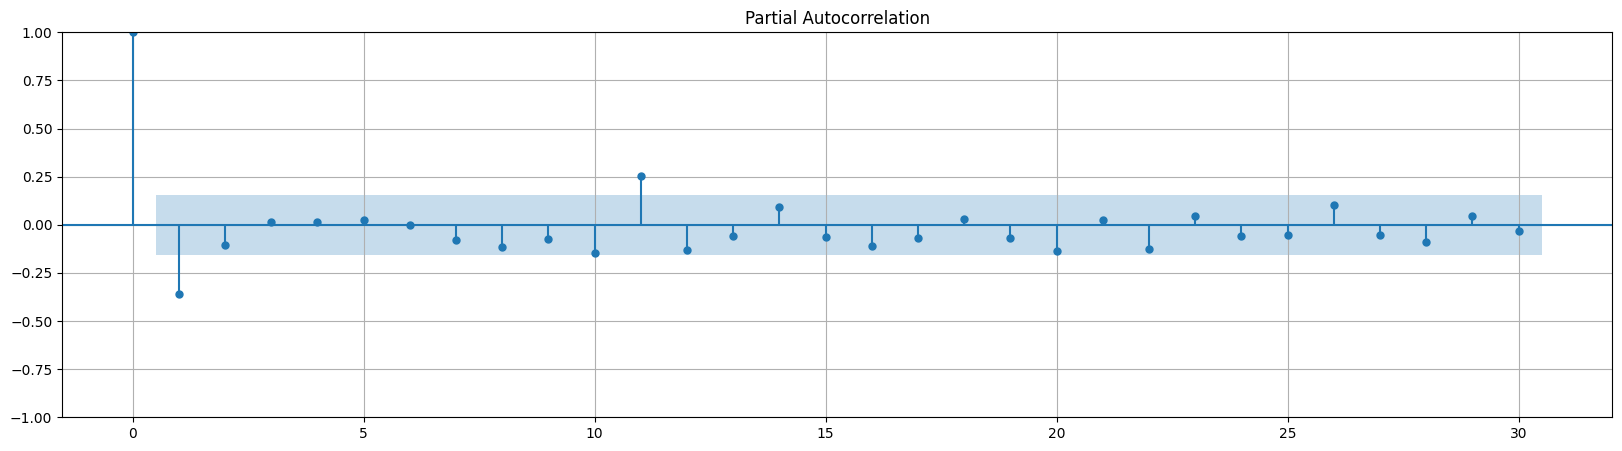

In [ ]:
plt.figure(figsize=(20, 5))
plt.grid()
plot_pacf(sddiff_int , ax=plt.gca(), lags = 30)
plt.show()

# FITTING ARIMA AND SARIMA MODELS ON RPM_DOMESTIC

In [ ]:
df_sddiff = pd.DataFrame({'Date': df['Date']})
df_sddiff['sddiff_domestic'] = sddiff_dom
df_sddiff['sddiff_international'] = sddiff_int
df_sddiff.isnull().sum()

Date                     0
sddiff_domestic         13
sddiff_international    13
dtype: int64

In [ ]:
train_df_sddiff = df_sddiff[:int(df_sddiff.shape[0]*0.8)]
test_df_sddiff = df_sddiff[int(df_sddiff.shape[0]*0.8):]
train_df_sddiff.shape, test_df_sddiff.shape

((139, 3), (35, 3))

In [ ]:
model_arima_dom = ARIMA(train_df_sddiff['sddiff_domestic'], order=(2,0,2))
model_arima_dom_fit = model_arima_dom.fit()

print(model_arima_dom_fit.summary())

                               SARIMAX Results                                
Dep. Variable:        sddiff_domestic   No. Observations:                  139
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1930.616
Date:                Sat, 13 Apr 2024   AIC                           3873.231
Time:                        05:53:05   BIC                           3890.838
Sample:                             0   HQIC                          3880.386
                                - 139                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4324.5794   5.82e+04     -0.074      0.941   -1.18e+05     1.1e+05
ar.L1         -0.9029      2.657     -0.340      0.734      -6.110       4.304
ar.L2         -0.1631      1.383     -0.118      0.9

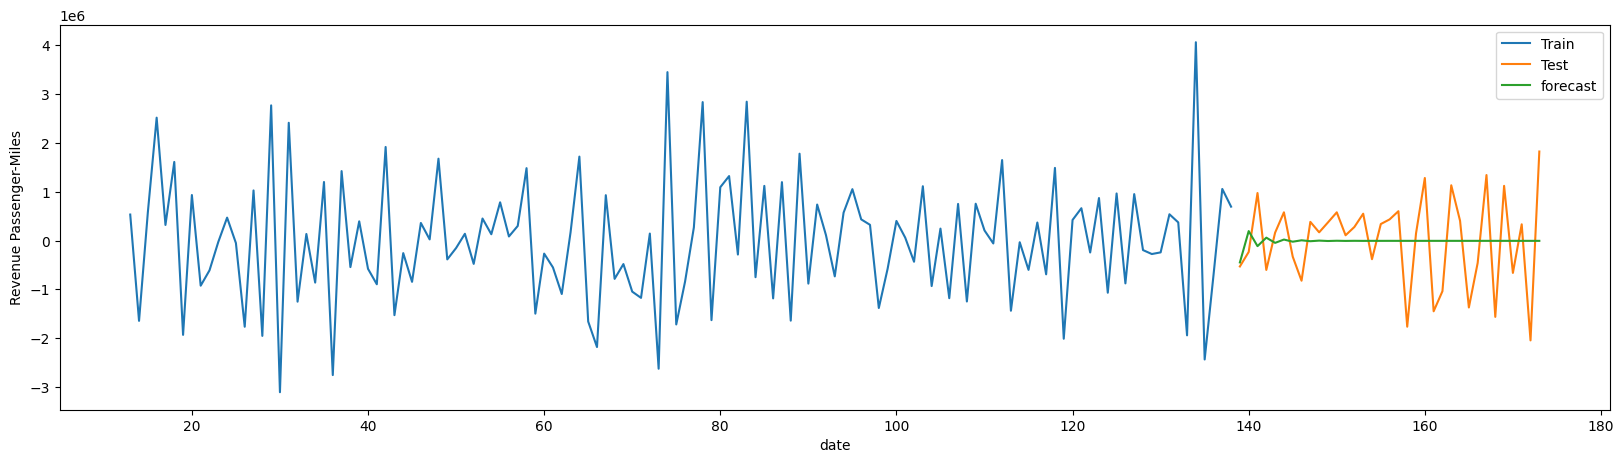

In [ ]:
arima_forecast_dom = model_arima_dom_fit.forecast(steps=len(test_df_sddiff))

plt.figure(figsize = (20,5))
plt.plot(train_df_sddiff['sddiff_domestic'],label='Train')
plt.plot(test_df_sddiff['sddiff_domestic'], label = 'Test')
plt.plot(arima_forecast_dom , label ='forecast')
plt.xlabel('date')
plt.ylabel('Revenue Passenger-Miles')
plt.legend()
plt.show()

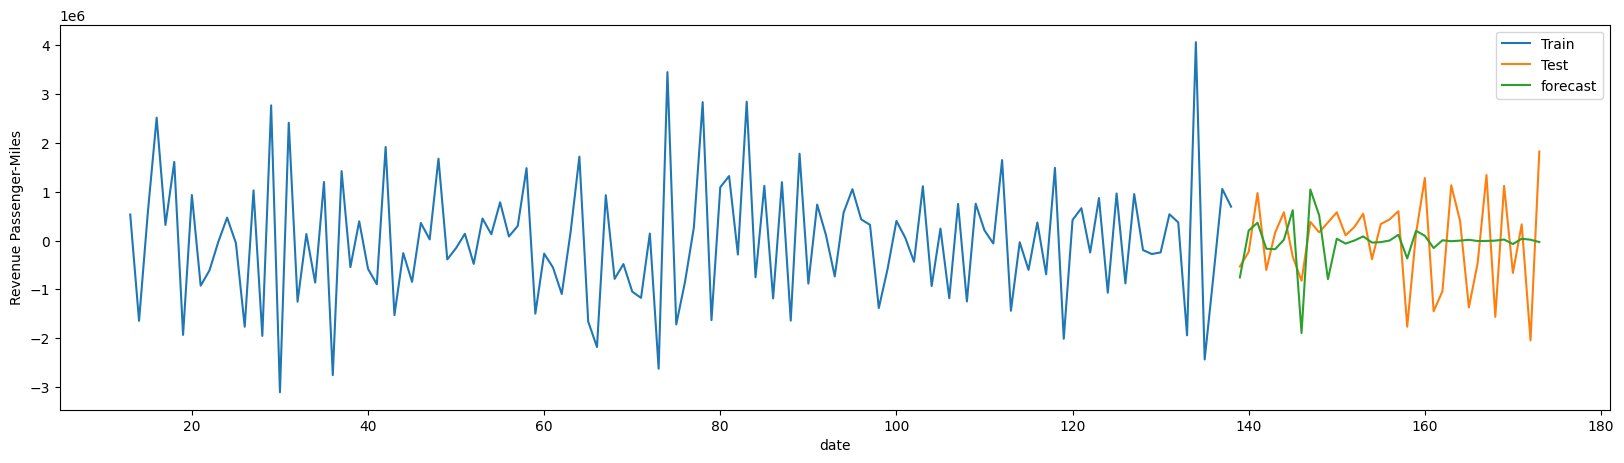

In [ ]:
model_sarima_dom = SARIMAX(train_df_sddiff['sddiff_domestic'], order=(1,0,1), seasonal_order=(1,0,1,12))
model_sarima_dom_fit = model_sarima_dom.fit()

sarima_forecast_dom = model_sarima_dom_fit.forecast(steps=len(test_df_sddiff))

plt.figure(figsize=(20,5))
plt.plot(train_df_sddiff['sddiff_domestic'],label='Train')
plt.plot(test_df_sddiff['sddiff_domestic'], label = 'Test')
plt.plot(sarima_forecast_dom , label ='forecast')
plt.xlabel('date')
plt.ylabel('Revenue Passenger-Miles')
plt.legend()
plt.show()

# FITTING ARIMA AND SARIMA MODELS ON RPM_INTERNATIONAL

In [ ]:
model_arima_int = ARIMA(train_df_sddiff['sddiff_international'], order = (1,1,1))
model_arima_int_fit = model_arima_int.fit()

print(model_arima_int_fit.summary())

                                SARIMAX Results                                 
Dep. Variable:     sddiff_international   No. Observations:                  139
Model:                   ARIMA(1, 1, 1)   Log Likelihood               -1953.597
Date:                  Sat, 13 Apr 2024   AIC                           3913.194
Time:                          05:53:07   BIC                           3921.976
Sample:                               0   HQIC                          3916.763
                                  - 139                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3733      0.091     -4.125      0.000      -0.551      -0.196
ma.L1         -0.9931      0.103     -9.625      0.000      -1.195      -0.791
sigma2      2.052e+12    2.9e-14   7

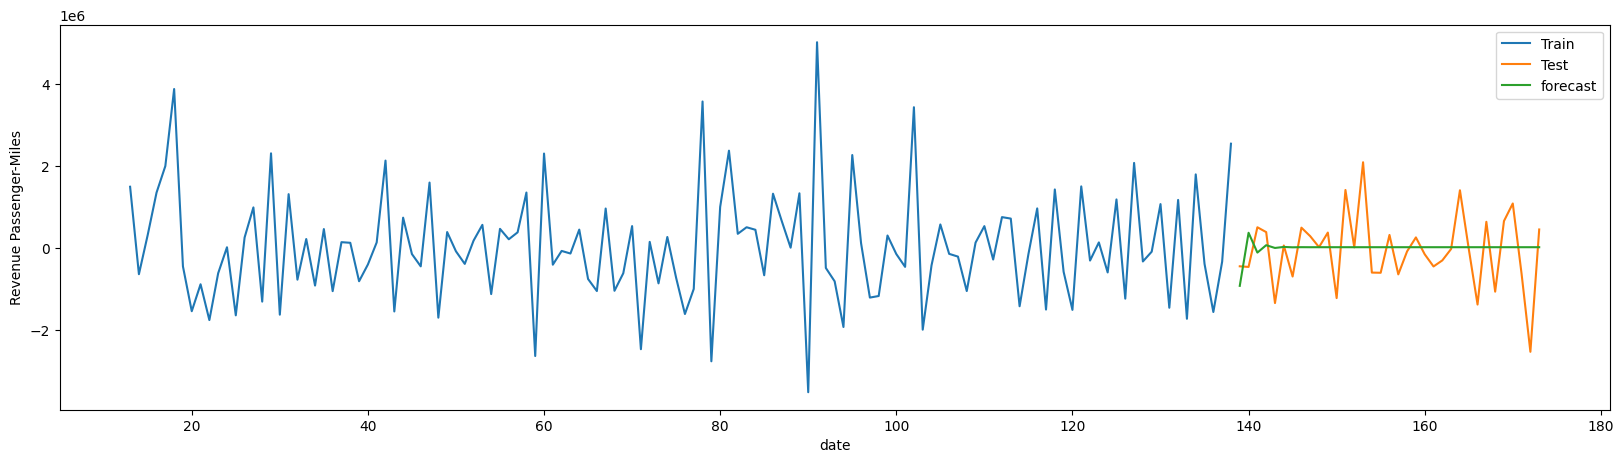

In [ ]:
arima_forecast_int = model_arima_int_fit.forecast(steps=len(test_df_sddiff))

plt.figure(figsize=(20,5))
plt.plot(train_df_sddiff['sddiff_international'],label='Train')
plt.plot(test_df_sddiff['sddiff_international'], label = 'Test')
plt.plot(arima_forecast_int , label ='forecast')
plt.xlabel('date')
plt.ylabel('Revenue Passenger-Miles')
plt.legend()
plt.show()

In [ ]:
model_sarima_int = SARIMAX(train_df_sddiff['sddiff_international'], order=(1,0,1), seasonal_order = (1,0,1,12))
model_sarima_int_fit = model_sarima_int.fit()

print(model_sarima_int_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:               sddiff_international   No. Observations:                  139
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood               -1941.257
Date:                            Sat, 13 Apr 2024   AIC                           3892.514
Time:                                    05:53:08   BIC                           3907.187
Sample:                                         0   HQIC                          3898.477
                                            - 139                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2441      0.372     -0.656      0.512      -0.973       0.485
ma.L1         -0.0611      0.364   

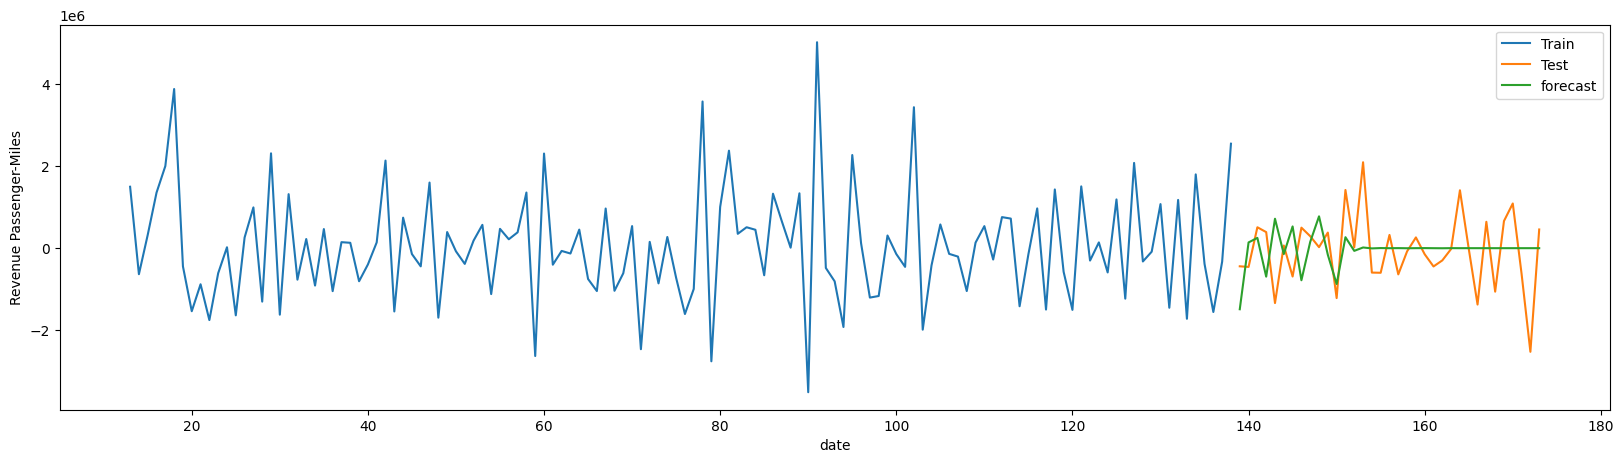

In [ ]:
sarima_forecast_int = model_sarima_int_fit.forecast(steps=len(test_df_sddiff))

plt.figure(figsize=(20,5))
plt.plot(train_df_sddiff['sddiff_international'],label='Train')
plt.plot(test_df_sddiff['sddiff_international'], label = 'Test')
plt.plot(sarima_forecast_int , label ='forecast')
plt.xlabel('date')
plt.ylabel('Revenue Passenger-Miles')
plt.legend()
plt.show()

# AUTO ARIMA ON DOMESTIC

In [ ]:
model_auto_arima = auto_arima(df['RPM_Domestic'], seasonal=True, trace = True, m = 12)
model_auto_arima_fit = model_auto_arima.fit(df['RPM_Domestic'])
print(model_auto_arima_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=5254.196, Time=10.04 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=5180.815, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=5216.379, Time=1.49 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=5137.114, Time=0.84 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=5217.915, Time=0.09 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=5141.290, Time=0.42 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=5138.937, Time=2.19 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=5133.852, Time=2.27 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=5133.387, Time=2.75 sec
 ARIMA(0,0,1)(2,1,2)[12] intercept   : AIC=5133.879, Time=10.62 sec
 ARIMA(0,0,1)(2,1,1)[12] intercept   : AIC=5133.575, Time=3.21 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=5151.974, Time=2.24 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=5247.847, Time=10.89 sec
 ARIMA(0,0,2)(1,1,2)[12] intercept   : AIC=5127.642, Time=4.51 sec
 ARIMA(0,0,2)(0,

In [ ]:
model_autosarima_dom = SARIMAX(train_df_exp['RPM_Domestic'], order=(0,0,4), seasonal_order = (1,1,2,12))
model_autosarima_dom_fit = model_autosarima_dom.fit()

print(model_autosarima_dom_fit.summary())

                                        SARIMAX Results                                        
Dep. Variable:                            RPM_Domestic   No. Observations:                  121
Model:             SARIMAX(0, 0, 4)x(1, 1, [1, 2], 12)   Log Likelihood               -1724.221
Date:                                 Sat, 13 Apr 2024   AIC                           3464.441
Time:                                         05:55:29   BIC                           3485.972
Sample:                                              0   HQIC                          3473.173
                                                 - 121                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1919      0.063      3.065      0.002       0.069       0

In [ ]:
sarimax_forecast_dom = model_autosarima_dom_fit.forecast(len(test_df_exp['RPM_Domestic']))
further_forecast_dom =
sarimax_forecast_dom

121    4.484173e+07
122    4.593636e+07
123    4.198559e+07
124    4.077868e+07
125    4.996529e+07
           ...     
188    5.227931e+07
189    5.436825e+07
190    5.313706e+07
191    4.386419e+07
192    4.667576e+07
Name: predicted_mean, Length: 72, dtype: float64

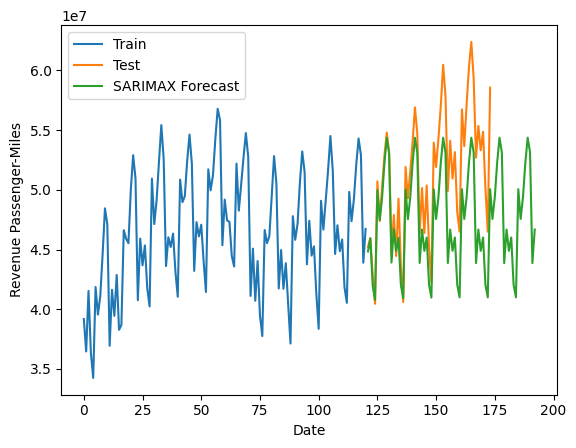

In [ ]:
plt.plot(train_df_exp['RPM_Domestic'], label='Train')
plt.plot(test_df_exp['RPM_Domestic'], label='Test')
plt.plot(sarimax_forecast_dom, label='SARIMAX Forecast')
plt.xlabel('Date')
plt.ylabel('Revenue Passenger-Miles')
plt.legend()
plt.show()

In [ ]:
test_predictions = model_autosarima_dom_fit.forecast(len(test_df_exp))

## MAPE For TRAIN and TEST data

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape_train = mean_absolute_percentage_error(test_df_exp['RPM_Domestic'],test_predictions)
print('MAPE for Train Data:', mape_train)

MAPE for Train Data: 0.07341664941856456


In [ ]:
mape_train = mean_absolute_percentage_error(train_df_exp['RPM_Domestic'], model_autosarima_dom_fit.fittedvalues)
print('MAPE for Train Data:', mape_train)


MAPE for Train Data: 0.1078815538940157


# AUTO ARIMA ON INTERNATIONAL

In [ ]:
model_autosarima_int = SARIMAX(train_df_exp['RPM_International'], order=(1,1,0), seasonal_order = (0,1,1,12))
model_autosarima_int_fit = model_autosarima_int.fit()

print(model_autosarima_int_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                    RPM_International   No. Observations:                  121
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood               -1674.930
Date:                              Sat, 13 Apr 2024   AIC                           3355.860
Time:                                      05:55:30   BIC                           3363.907
Sample:                                           0   HQIC                          3359.123
                                              - 121                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0910      0.035     -2.585      0.010      -0.160      -0.022
ma.S.L12      -0.07

In [ ]:
sarimax_forecast_int = model_autosarima_int_fit.forecast(steps=72)

sarimax_forecast_int

121    3.990654e+07
122    4.370740e+07
123    4.300333e+07
124    3.682741e+07
125    4.517303e+07
           ...     
188    5.549916e+07
189    5.865564e+07
190    5.798232e+07
191    5.115384e+07
192    4.885677e+07
Name: predicted_mean, Length: 72, dtype: float64

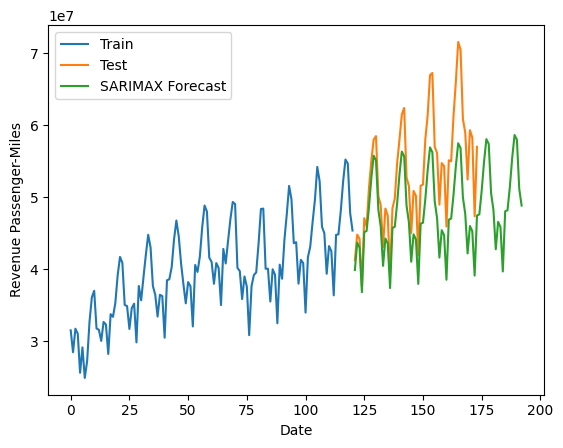

In [ ]:
plt.plot(train_df_exp['RPM_International'], label='Train')
plt.plot(test_df_exp['RPM_International'], label='Test')
plt.plot(sarimax_forecast_int, label='SARIMAX Forecast')
plt.xlabel('Date')
plt.ylabel('Revenue Passenger-Miles')
plt.legend()
plt.show()

In [ ]:
model_autosarima_int_fit.params

ar.L1      -9.098850e-02
ma.S.L12   -7.456389e-02
sigma2      1.663989e+12
dtype: float64

# LSTM ON RPM_DOMESTIC

In [ ]:
scaler = MinMaxScaler()
scaled_dom = scaler.fit_transform(df['RPM_Domestic'].values.reshape((-1,1)))

In [ ]:
print(len(scaled_dom), scaled_dom.shape)

174 (174, 1)


In [ ]:
def create_dataset(data, look_back):
  X, y = [], []
  for i in range(len(data)-look_back):
    X.append(data[i:i+look_back])
    y.append(data[i+look_back])
  return np.array(X), np.array(y)

look_back = 12
X, y = create_dataset(scaled_dom, look_back)
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (162, 12, 1)
Shape of y: (162, 1)


In [ ]:
date_X, date_y = create_dataset(df['Date'], look_back)
print('Shape of date_X:', date_X.shape)
print('Shape of date_y:', date_y.shape)

Shape of date_X: (162, 12)
Shape of date_y: (162,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)
X_train_date, X_test_date, y_train_date, y_test_date = train_test_split(date_X, date_y, test_size = 0.2, shuffle = False)

In [ ]:
model = Sequential()
model.add(LSTM(50, activation = 'relu', input_shape = (look_back, 1)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
history = model.fit(X_train, y_train, epochs = 1000, batch_size = 128, verbose = 1)

Epoch 1/1000
2/2 [==============================] - 2s 12ms/step - loss: 0.2543
Epoch 2/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2356
Epoch 3/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.2183
Epoch 4/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2021
Epoch 5/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.1871
Epoch 6/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.1724
Epoch 7/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.1574
Epoch 8/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.1428
Epoch 9/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.1284
Epoch 10/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.1136
Epoch 11/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.0986
Epoch 12/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.0835
Epoch 13/1000
2/2 [==================

In [ ]:
train_forecast = scaler.inverse_transform(model.predict(X_train))
test_forecast = scaler.inverse_transform(model.predict(X_test))
train_forecast.shape, test_forecast.shape

2/2 [==============================] - 0s 7ms/step


((129, 1), (33, 1))

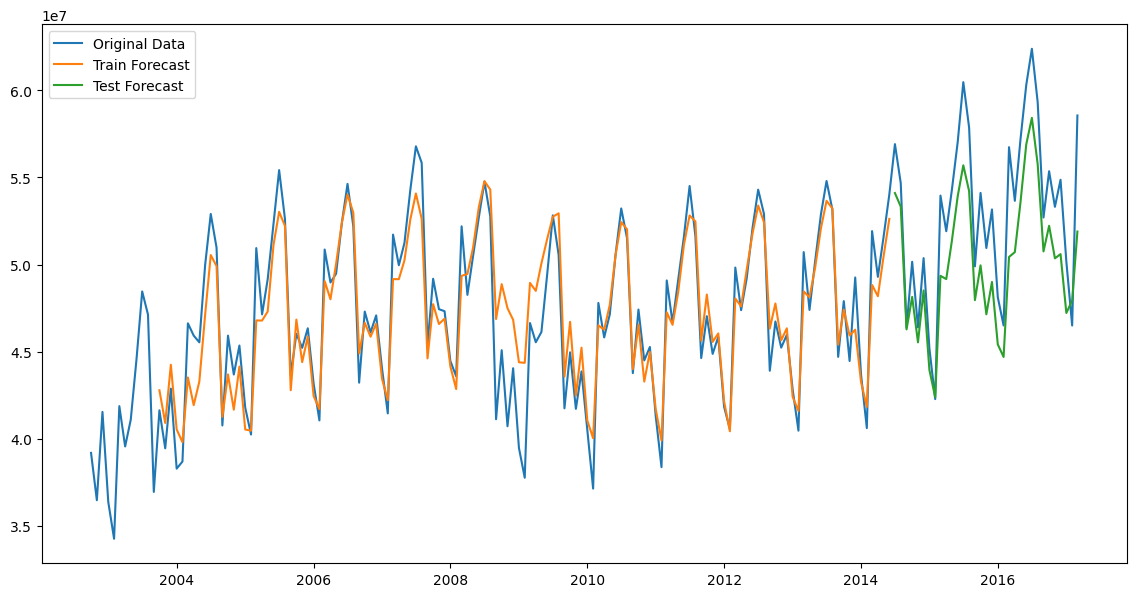

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['RPM_Domestic'], label='Original Data')
plt.plot(y_train_date, train_forecast, label='Train Forecast')
plt.plot(y_test_date, test_forecast, label='Test Forecast')
plt.legend()
plt.show()

In [ ]:
# Forecast future values
future_steps = 10  # Number of future steps to forecast
future_data = scaled_dom[-look_back:]  # Use the last 'look_back' values from the dataset

forecast = []
for _ in range(future_steps):
    # Reshape the data to match the input shape of the model
    input_data = future_data.reshape(1, look_back, 1)

    # Make a prediction for the next time step
    prediction = model.predict(input_data)[0, 0]

    # Update future_data by appending the prediction and removing the first value
    future_data = np.append(future_data[1:], prediction)

    # Append the prediction to the forecast list
    forecast.append(prediction)

# Print or use the forecasted values
print('Forecasted values:', forecast)

1/1 [==============================] - 0s 23ms/step
Forecasted values: [0.65215874, 0.77753365, 0.86070013, 0.8799643, 0.79057664, 0.63642627, 0.6683309, 0.6287226, 0.6240514, 0.4990689]


In [ ]:
pip install keras

2/2 [==============================] - 0s 12ms/step


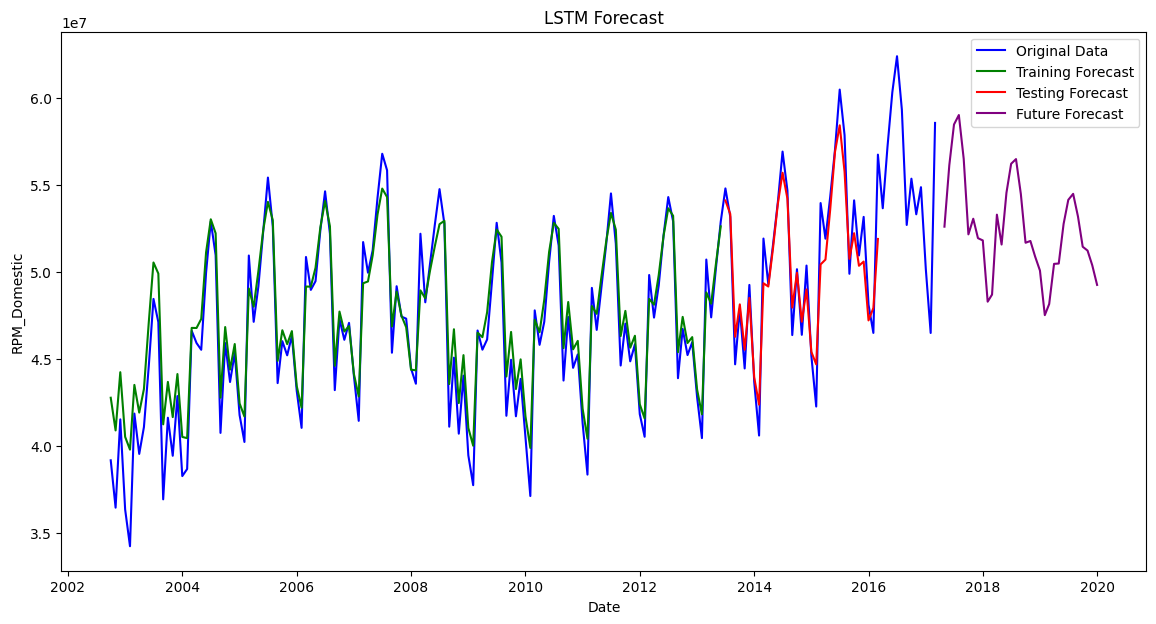

In [ ]:
# Forecast Future Values
# Generate future dates up to 2024
future_dates = pd.date_range(start=df['Date'].iloc[-2], end='2020-01-01', freq='M')[1:]
future_steps = len(future_dates)
future_input = scaled_dom[-look_back:].reshape(1, look_back, 1)

future_forecast = []
for _ in range(future_steps):
    forecast_step = model.predict(future_input)
    future_forecast.append(forecast_step)
    future_input = np.append(future_input[:,1:,:], forecast_step.reshape(1,1,1), axis=1)

future_forecast = scaler.inverse_transform(np.array(future_forecast).reshape(-1, 1))

# Plot Results
train_forecast = scaler.inverse_transform(model.predict(X_train))
test_forecast = scaler.inverse_transform(model.predict(X_test))

plt.figure(figsize=(14, 7))

# Plot Original Data
plt.plot(df['Date'], df['RPM_Domestic'], label='Original Data', color='blue')

# Plot Training Data and Forecast
plt.plot(df['Date'][:len(train_forecast)], train_forecast, label='Training Forecast', color='green')

# Plot Testing Data and Forecast
plt.plot(df['Date'][len(train_forecast):len(train_forecast)+len(test_forecast)], test_forecast, label='Testing Forecast', color='red')

# Plot Future Forecast
plt.plot(future_dates, future_forecast, label='Future Forecast', color='purple')


plt.xlabel('Date')
plt.ylabel('RPM_Domestic')
plt.title('LSTM Forecast')
plt.legend()
plt.show()